In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic_train= pd.read_csv("../input/titanic/train.csv")
titanic_test=pd.read_csv("../input/titanic/test.csv")
titanic_train.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [3]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_train.shape

(891, 12)

In [5]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

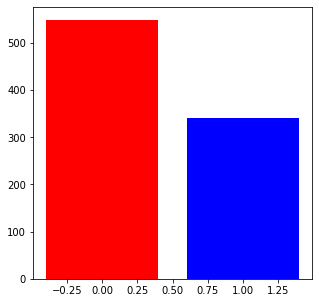

In [6]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=["r","b"])
plt.show()

In [7]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

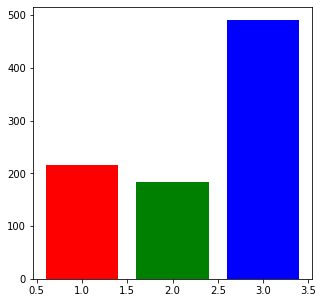

In [8]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=["Blue","Red","Green"])
plt.show()

In [9]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

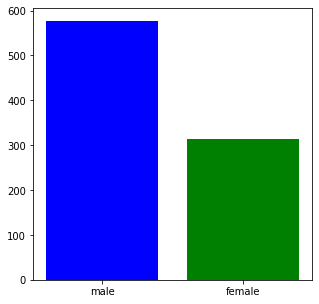

In [10]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color=["Blue","Green"])
plt.show()


In [11]:
titanic_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

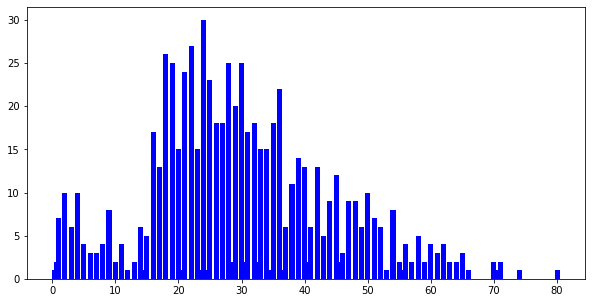

In [12]:
plt.figure(figsize=(10,5))
plt.bar(list(titanic_train['Age'].value_counts().keys()),list(titanic_train['Age'].value_counts()),color=["Blue"])
plt.show()

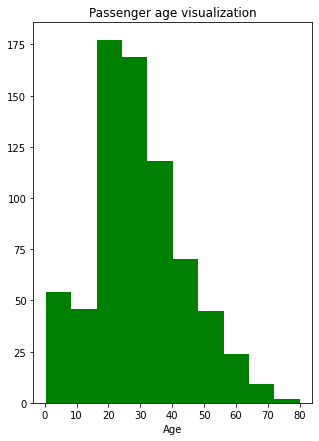

In [13]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train["Age"],color="Green")
plt.title("Passenger age visualization")
plt.xlabel("Age")
plt.show()

In [14]:
titanic_train['Survived'].isnull() #checking for any null value in Survival column of train_titanic data set

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [15]:
sum(titanic_train['Survived'].isnull())

0

In [16]:
sum(titanic_train['Age'].isnull())

177

In [17]:
titanic_train=titanic_train.dropna()

In [18]:
sum(titanic_train['Age'].isnull())

0

In [19]:
x_train=titanic_train[['Age']]
y_train=titanic_train[['Survived']]


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtc = DecisionTreeClassifier()

In [22]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

# NOW ITS TIME TO DEAL WITH TEST SET

In [23]:
sum(titanic_test['Age'].isnull())

86

In [24]:
titanic_test=titanic_test.dropna()

In [25]:
sum(titanic_test['Age'].isnull())

0

In [26]:
x_test=titanic_test[['Age']]

In [27]:
y_predct=dtc.predict(x_test)

In [28]:
y_predct

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])